# Self-learning 3.1 : Matplotlib animation

We 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display, HTML, Image

## topic 1. 

It is generally more reliable to use `IPython.display.HTML` for displaying animations in Jupyter notebooks, rather than using `plt.show()` with `%matplotlib notebook` or `%matplotlib widget`.

There are two main reasons for this: 
 - `%matplotlib notebook` and `%matplotlib widget` are not always stable.  Both are intended to enable interactive or animated plots in Jupyter, but their behavior can vary depending on the environment. (For example, in my case, only `%matplotlib widget` works reliably.) This inconsistency can be cumbersome, especially when sharing notebooks with others.
 - `IPython.display.HTML` automatically includes several control buttons such as stop/start button and speed controller etc.. In contrast, `plt.show()` with `%matplotlib notebook` ro `%matplotlib widget` does not provide such controls (at least in their simplest use).

For example, in the code below, only `%matplotlib widget` works in my environment:

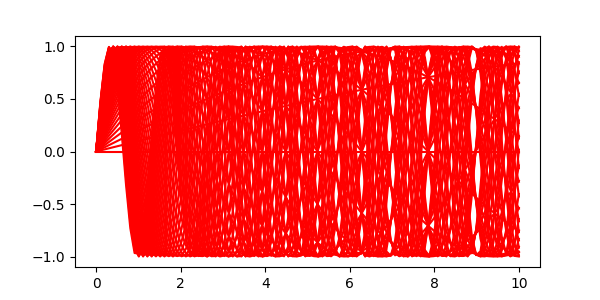

In [2]:
#%matplotlib notebook
%matplotlib widget

x = np.linspace(0,10, 100)

fig = plt.figure(figsize=(6,3))
imgs = []
for f in range(50):
    y = np.sin(0.1*f*x)
    imgs.append(plt.plot(x,y,'r'))
ani = animation.ArtistAnimation(fig, imgs)
plt.show()

In [3]:
plt.close()  # to stop the kernel

Let us look at how `HTML` works, with combination with `to_jshtml()`, in the next cell:

In [4]:
x = np.linspace(0,10, 100)

fig = plt.figure(figsize=(6,3))
imgs = []
for f in range(50):
    y = np.sin(0.1*f*x)
    imgs.append(plt.plot(x,y,'r'))
ani = animation.ArtistAnimation(fig, imgs)

# ---- up to this line, the code is the same as that in the cell above. -----

display(HTML(ani.to_jshtml()))   
plt.close(fig)

For completeness, we consider the case where we use `FuncAnimation` instead of `ArtistAnimation`.  

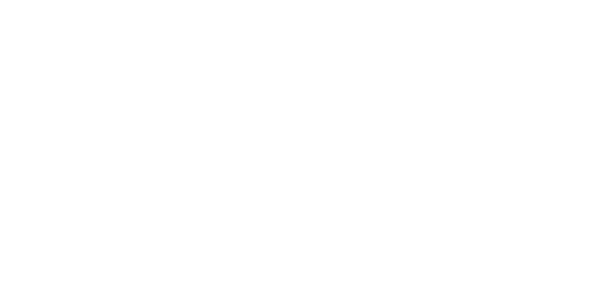

In [5]:
x = np.linspace(0,10, 100)

def update(i):
    if i!=0:
        plt.cla()
    y = np.sin(0.1*i*x)
    plt.plot(x,y,'r')

fig = plt.figure(figsize=(6,3))
ani = animation.FuncAnimation(fig, update, frames=range(50))
plt.show()

In [6]:
plt.close() # to stop the kernel

In [7]:
x = np.linspace(0,10, 100)

def update(i):
    if i!=0:
        plt.cla()
    y = np.sin(0.1*i*x)
    plt.plot(x,y,'r')

fig = plt.figure(figsize=(6,3))
ani = animation.FuncAnimation(fig, update, frames=range(50))

# ---- up to this line, the code is the same as that in the cell above. -----

display(HTML(ani.to_jshtml()))   
plt.close(fig)

## topic 2. 

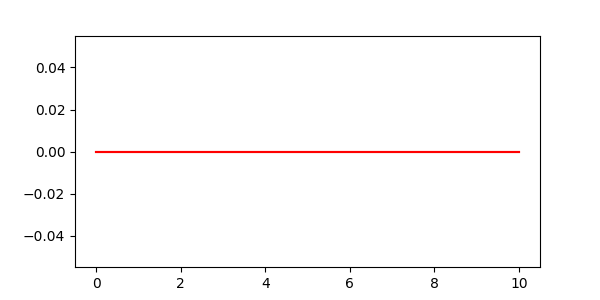

In [8]:
x = np.linspace(0,10, 100)

def update(i):
    if i!=0:
        plt.cla()
    y = np.sin(0.1*i*x)
    plt.plot(x,y,'r')

fig = plt.figure(figsize=(6,3))
ani = animation.FuncAnimation(fig, update, frames=range(50))

# ---- up to this line, the code is the same as that in the cell above. -----

out_dir = os.path.join("results", "self_3_1")
os.makedirs(out_dir, exist_ok=True)
outpath = os.path.join(out_dir, "sine.gif")

ani.save(outpath, writer="pillow") 
plt.close(fig)
display(Image(filename=outpath))